<a href="https://colab.research.google.com/github/Aergia-incognito/C.S-Project/blob/main/n221a_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 2 / NOTE 1*

# 📝 Assignment
---

# Decision Trees(결정트리)

우리가 구하고자 하는 것 : Your task is to predict whether people got H1N1 vaccines using information they shared about their backgrounds, opinions, and health behaviors.

## 캐글 인클래스(InClass) Competitions

### 1) 대회 참여(Join) 및 데이터셋 준비

- [캐글 계정을 만드세요](https://www.kaggle.com/), 공유된 인클래스 대회 url을 통해 이동한 후 대회에 참여하세요.
- H1N1 데이터를 훈련/검증/테스트 셋으로 나누어 준비하세요
- **(Urclass Quiz) 훈련데이터셋을 사용해 H1N1 타겟으로 기준모델을 설정하세요. 기준모델의 정확도를 제출하세요.**
    1. 0.24
    2. 0.50
    3. 0.76
    4. 1


In [1]:
!pip install category_encoders
!pip install pandas-profiling==3.1.0

In [2]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
target = 'vacc_h1n1_f'
train = pd.merge(pd.read_csv('/content/drive/MyDrive/train.csv'), 
                 pd.read_csv('/content/drive/MyDrive/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [4]:
train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,census_region,census_msa,n_adult_r,household_children,n_people_r,employment_industry,employment_occupation,hhs_region,state,vacc_h1n1_f
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,4,"MSA, Not Principle City",2.0,3.0,5.0,NaN,NaN,9,CALIFORNIA,0
1,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,"MSA, Principle City",1.0,0.0,1.0,Accommodation and Food Services Industries,Food Preparation and Serving Related Occupations,7,NEBRASKA,0
2,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,"MSA, Not Principle City",1.0,2.0,3.0,Transportation and Warehousing Industries,Transportation and Material Moving Occupations,1,MASSACHUSETTS,0
3,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3,"MSA, Not Principle City",2.0,2.0,4.0,"Professional, Scientific, and Technical Servic...",Legal Occupations,6,LOUISIANA,0
4,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3,"MSA, Not Principle City",3.0,0.0,3.0,Education Services Industries,Office and Administrative Support Occupations,4,ALABAMA,1


In [5]:
train.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_insurance               float64
health_worker                  float64
opinion_h1n1_vacc_effective     object
opinion_h1n1_risk               object
opinion_h1n1_sick_from_vacc     object
opinion_seas_vacc_effective     object
opinion_seas_risk               object
opinion_seas_sick_from_vacc     object
agegrp                          object
education_comp                 float64
raceeth4_i                       int64
sex_i                            int64
inc_pov                  

In [6]:
#8:2 비율로 나눠준다
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)


train.shape, val.shape, test.shape

((33723, 39), (8431, 39), (28104, 38))

In [7]:
train[target].value_counts(normalize=True) #기준모델 0.76

0    0.760935
1    0.239065
Name: vacc_h1n1_f, dtype: float64

214에서 배웠던 걸로 accuracy 찾아보기(분류 모델이므로 기준모델을 타겟의 최빈 클래스로 잡는다. 이때 최빈 클래스는 0이다.)


In [8]:
# mode(): Return the highest frequency value in a Series. 214 참고
major = train[target].mode()[0]
# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측
y_pred = [major] * len(train[target])
y_train = train[target]

In [9]:
# 최다 클래스의 빈도가 정확도가 됩니다.
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.7609346736648578


### 2) 데이터 EDA 및 특성공학 수행
- profiling을 사용하여 데이터를 살펴보고, missing value, zeros, cardinarity 등을 확인하여 처리하세요.
- 본인만의 특성공학을 수행하세요.


In [10]:
from pandas_profiling import ProfileReport
#pr=data.profile_report() # 프로파일링 결과 리포트를 pr에 저장
# data.profile_report() # 바로 결과 보기

profile = ProfileReport(train, minimal=True).to_notebook_iframe() #to_notebook_iframe은 주피터노트북에서 결과 확인할 때 필요. ProfileReport(minimal = True)는 미니멈 모드, simplified report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

EDA를 통해 모델이 high cardinality를 가지고 있으며, missing cells로 인해 대부분의 경고가 뜬다는 것을 알 수 있다. 


In [11]:
#중복특성 확인-> 중복값 없음
train.T.duplicated()

h1n1_concern                   False
h1n1_knowledge                 False
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home        False
behavioral_touch_face          False
doctor_recc_h1n1               False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_insurance               False
health_worker                  False
opinion_h1n1_vacc_effective    False
opinion_h1n1_risk              False
opinion_h1n1_sick_from_vacc    False
opinion_seas_vacc_effective    False
opinion_seas_risk              False
opinion_seas_sick_from_vacc    False
agegrp                         False
education_comp                 False
raceeth4_i                     False
sex_i                          False
inc_pov                        False
marital                        False
r

중복값은 없으므로 고려하지 않는다. high cardinality와 missing data만 고려한다. 

In [12]:
#cardinality 확인
train.describe(exclude = 'number').T.sort_values(by = 'unique') #왜 target은 'target'으로 하지 않는데 'number'는 이렇게 하는지?

,count,unique,top,freq
employment_status,25466,3,Employed,13722
census_msa,33723,3,"MSA, Not Principle City",15202
opinion_h1n1_vacc_effective,26637,6,Somewhat Effective,11710
opinion_h1n1_risk,26602,6,Somewhat Low,9980
opinion_h1n1_sick_from_vacc,26568,6,Not Very Worried,9229
opinion_seas_vacc_effective,26519,6,Somewhat Effective,11571
opinion_seas_risk,26466,6,Somewhat Low,9057
opinion_seas_sick_from_vacc,26413,6,Not At All Worried,11813
agegrp,33723,7,65+ Years,6821
employment_industry,13714,23,Health Care and Social Assistance Industries,2451


n_people_r과 n_adult_r의 차이가 뭘까? 우선 adults와 other adults라고 되어 있으므로 어른의 합을 해주기로 한다. 

In [13]:
train[['n_people_r']] #얘가 더 포괄적인 것 같기도 하고..

,n_people_r
20365,4.0
29138,4.0
36128,1.0
39793,2.0
32973,5.0
...,...
8747,5.0
4412,2.0
19064,3.0
40906,4.0


In [14]:
train[['n_adult_r']]

,n_adult_r
20365,4.0
29138,2.0
36128,1.0
39793,2.0
32973,2.0
...,...
8747,4.0
4412,2.0
19064,2.0
40906,3.0


state의 고유값이 51개나 되기 때문에 조정해주어야 한다. 

In [28]:
import numpy as np

def engineering(df):

    
    # 높은 카디널리티를 가지는 특성을 제거
    selected_cols = df.select_dtypes(include=['number', 'object']) #number(int, float), object 이외에도 데이터 타입이 있을 수 잇음
    labels = selected_cols.nunique() # 특성별 카디널리티 리스트
    selected_features = labels[labels < 50].index.tolist() # 50보다 작은 특성 선택
    df = df[selected_features]
    
    # '행동'특성을 묶어서 하나의 컬럼으로 합쳐준다. 
    behaviorals = [col for col in df.columns if 'behavioral' in col] 
    df['behaviorals'] = df[behaviorals].sum(axis=1)

    ### 컬럼에 있는 특정값 삭제하기
    dels = [col for col in df.columns if ('employment' in col or 'seas' in col or 'rent' in col )]
    df.drop(columns=dels, inplace=True)

    # n_people_r은 총 사람 수 (수연님 자료 참고)
    df.drop(columns = ['n_adult_r', 'household_children'], axis=1, inplace=True)
        
    return df

train = engineering(train)
val = engineering(val)
test = engineering(test)


In [29]:
train.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_insurance', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'agegrp', 'education_comp', 'raceeth4_i',
       'sex_i', 'inc_pov', 'marital', 'census_region', 'census_msa',
       'n_people_r', 'hhs_region', 'vacc_h1n1_f', 'behaviorals'],
      dtype='object')

In [30]:
features = train.drop(columns=[target]).columns #타겟과 특성 분리

In [31]:
# 훈련/검증/테스트 데이터를 특성과 타겟으로 분리
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]


### 3) 모델링 수행
- 결정트리를 학습시킵니다. 하이퍼파라미터를 수정하여 성능을 높여보세요. 과적합을 주의하세요!
- 검증세트 스코어를 확인하세요.(평가지표는 F1-score입니다, 수식은 캐글 Overview-Evaluation 페이지를 확인해 주세요. 평가지표에 대한 내용은 다음에 자세히 배우고 활용할 것입니다 지금은 스코어를 올리기 위한 노력을 전혀 기울이지 말고 결정트리의 개념과 코드이해, 사용에 집중하세요!)
- 특성중요도를 그래프로 나타내 보세요
- **(Urclass Quiz) 검증세트의 F1-score를 제출하세요. (0.5 이상 통과)**

In [32]:
!pip install category_encoders

In [33]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=1, criterion='entropy')
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))

훈련 정확도:  0.9858553509474246
검증 정확도:  0.7553077926699087


In [34]:
y_val.value_counts(normalize=True)

0    0.761001
1    0.238999
Name: vacc_h1n1_f, dtype: float64

과적합되었다는 것을 알 수 있다. 과적합을 해결한다. 

In [35]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=10, random_state=2)
)

pipe.fit(X_train, y_train)
print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

훈련 정확도 0.8565963882216885
검증 정확도 0.8077333649626379


훈련정확도와 검증 정확도가 비슷해지면서 과적합이 줄었다는 것을 알 수 있다. 

In [36]:
from sklearn.metrics import f1_score

pred_train = pipe.predict(X_train)
pred_val = pipe.predict(X_val)

print('train set f1_score :', f1_score(y_train, pred_train))
print('validation set f1_score :', f1_score(y_val, pred_val))

train set f1_score : 0.6570699191604027
validation set f1_score : 0.5473331471655962


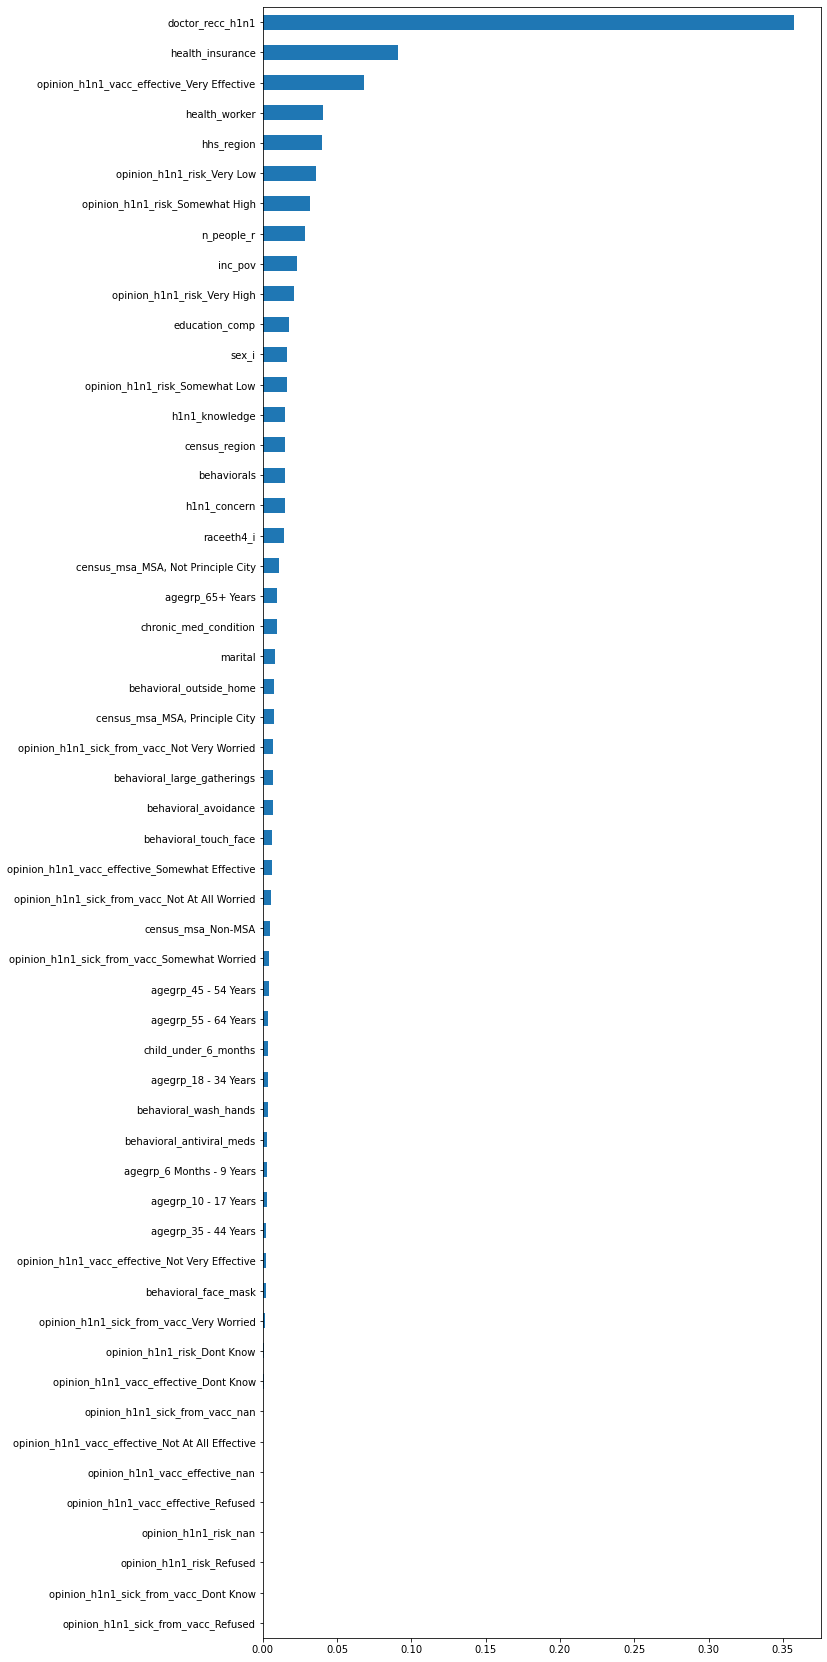

In [40]:
#특성중요도 시각화하기- 시각화 과정 다시 공부
import matplotlib.pyplot as plt
%matplotlib inline 

model_dt = pipe.named_steps['decisiontreeclassifier']
columns = pipe.named_steps['onehotencoder'].transform(X_val).columns
importances = pd.Series(model_dt.feature_importances_,columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

### 4) 테스트셋 예측 결과 제출(Submission)

- 테스트셋에 대한 예측 결과를 캐글에 제출 하세요.(스코어가 많이 낮게 나와도 결정트리를 잘 이해하고 결과를 내었다면 충분합니다!)
- **(Urclass Quiz) 캐글 Leaderboard의 본인 Score를 제출하세요.**
 

In [45]:
y_pred_test = pipe.predict(X_test)

sample_submission = pd.read_csv('/content/drive/MyDrive/submission.csv')
sample_submission['vacc_h1n1_f'] = y_pred_test
sample_submission.head(5)

,Id,vacc_h1n1_f
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [48]:
sample_submission.to_csv('13_Hanijoo.csv', index=False)

## 🔥 도전과제(Github - Discussion)

### 4) 2개 이상의 imputer를 사용해 각각 특성-타겟 관계 그래프를 그려 공유하고 다음 질문에 대해 서로 논의해 보세요. 
- scikit-learn imputer([scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html))
- seaborn plots 사용하여 관심있는 특성들과 target간의 관계를 그래프로 나타내 보세요.
- 사용하신 imputer는 각각 어떤 장단점을 갖고 있으며 어떤 상황에서 사용하면 좋을까요? 
- 만드신 특성-타겟 관계 그래프에서 차이점이 있다면 무엇이고, 왜 그런 차이가 발생했다고 생각하시나요? 
- [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html)
- [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html)

In [23]:
### 이곳에서 과제를 진행해 주세요 ###